In [3]:
from bs4 import BeautifulSoup
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
#covid=pd.read_csv('C:\\Users\inter\Downloads\COVID-2019 - ECDC (2020).csv')#,encoding='cp949')
#covid=pd.read_csv('C:\\Users\inter\Downloads\owid-covid-data.csv',encoding='cp949')
covid=pd.read_csv('C:\\Users\inter\Downloads\WHO-COVID-19-global-data.csv')


In [5]:
covid.head()
#covid['Country Name'].unique()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1


In [46]:
confirmed=pd.read_csv('C:\\Users\\inter\\Downloads\\time_series_covid19_confirmed_global.csv')
deaths=pd.read_csv('C:\\Users\\inter\\Downloads\\time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('C:\\Users\\inter\\Downloads\\time_series_covid19_recovered_global.csv')

#confirmed.head()
deaths.head()
#recovered.head()

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,168,169,173,178,187,193,205,216,218,219
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,32,32
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,542,548,555,561,568,575,582,592,600,609
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,3,3,4,4,4


### World-wide Covid-19 status
- 존스홉킨스 Covid-19 데이터를 이용한 현대건설 진출국 Covid-19 Data visualization 및 Prediction

In [8]:
confirmed_g=confirmed.groupby(['Country/Region']).sum()
confirmed_g.head()
confirmed_r=confirmed_g.transpose()
confirmed_r1=confirmed_r.drop(['Lat','Long'])

confirmed_r1.head()
#c_r2=confirmed_r1.rename(columns=confirmed_r1.loc['Country/Region'])
#c_r2=c_r2.drop(c_r2.index[0:2]) #시계열 자료 이외 삭제

#c_r2.head()
c_r2=confirmed_r1.astype(float)
c_r2=c_r2.reset_index()    #일자를 인덱스에서 열로 바꿈
c_r2['index']=pd.to_datetime(c_r2['index'])
c_r2=c_r2.set_index(['index'])
c_r2.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
index,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [94]:
def trans_df(x):   #원본 데이터프레임을 시계열 데이터프레임으로 변환하는 함수
    g=x.groupby(['Country/Region']).sum()
    r=g.transpose()
    r1=r.drop(['Lat','Long'])
    r2=r1.astype(float)
    r2=r2.reset_index()    #일자를 인덱스에서 열로 바꿈
    r2['index']=pd.to_datetime(r2['index'])
    r2=r2.set_index(['index'])
    return r2

c8=trans_df(confirmed)
d8=trans_df(deaths)
r8=trans_df(recovered)


# 국가별로 데이터프레임 합치는 함수(confirmed,deaths,recovered)
def mix_df_country(a):
    total_df=pd.DataFrame(columns=['date','Country/Region','confirmed','deaths','recovered'])
    total_df['date']=c8.index.tolist()
    total_df['Country/Region']=a
    total_df['confirmed']=c8[a].tolist()
    total_df['deaths']=d8[a].tolist()
    total_df['recovered']=r8[a].tolist()
    return total_df

def concat_df(list_):     #리스트 형태로 국가를 입력하면 데이터프레임으로 결합해줌
    total_df=pd.DataFrame()
    for i in list_:
        k=mix_df_country(i)
        total_df=pd.concat([total_df,k],axis=0,ignore_index=True)
    return total_df

In [95]:
country_list=['Korea, South','Burma','Indonesia','Singapore','Qatar','Kuwait','United Arab Emirates','Vietnam','Algeria','Chile','Venezuela','Panama']
ttl_df=concat_df(country_list) #상기 국가 데이터프레임 합치기 


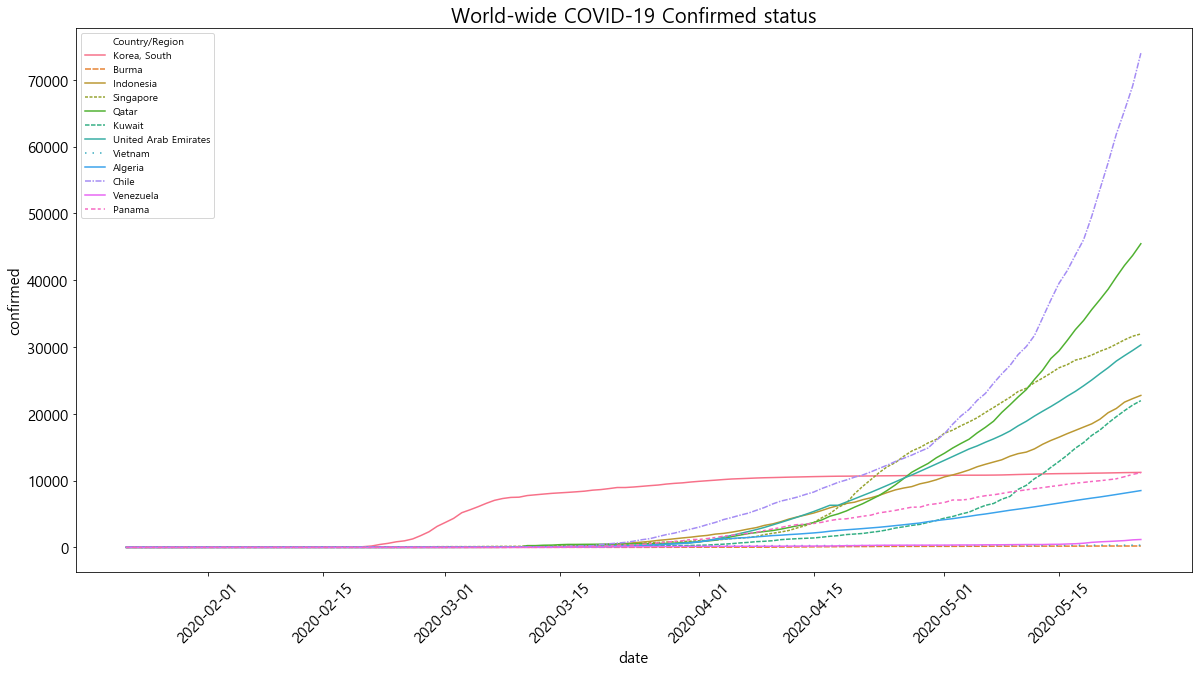

In [134]:
#진출국 확진자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Confirmed status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='confirmed',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

In [114]:
ttl_df['net_confirmed']=ttl_df['confirmed']-ttl_df['recovered']-ttl_df['deaths'] #순확진자수 구하기
ttl_df['survival_rate']=ttl_df['recovered']/ttl_df['confirmed'] #확진시 완치율 구하기
ttl_df['death_rate']=ttl_df['deaths']/ttl_df['confirmed']  #확진시 사망율 구하기


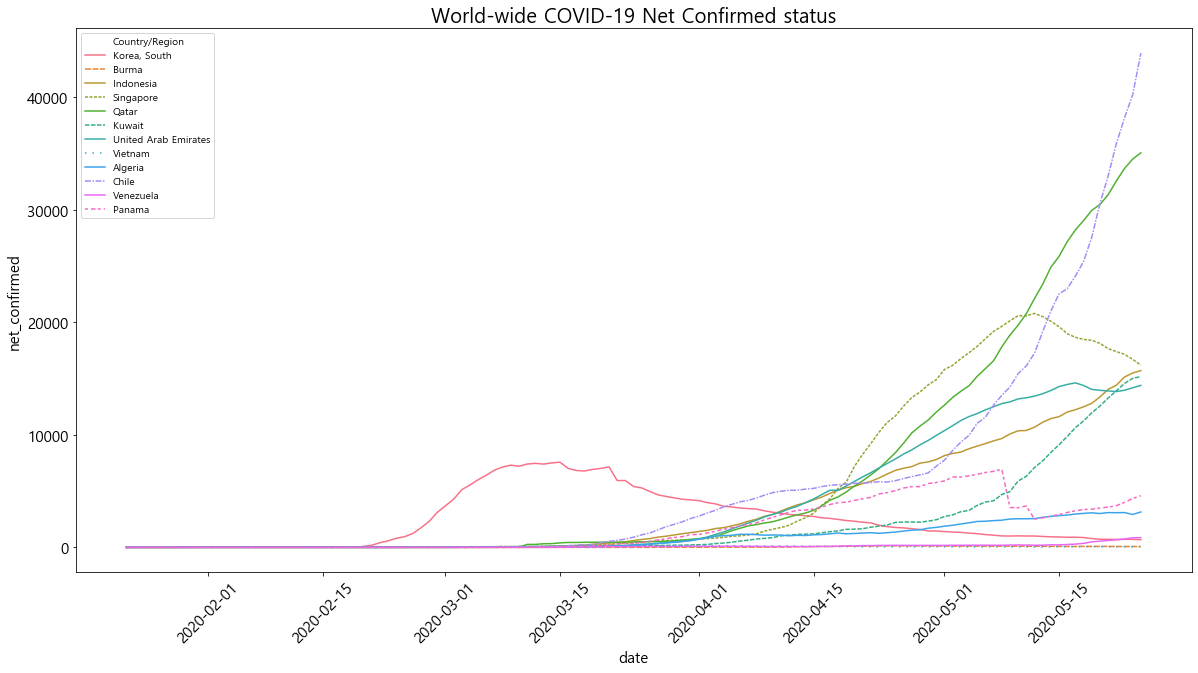

In [133]:
#진출국 순확진자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Net Confirmed status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='net_confirmed',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

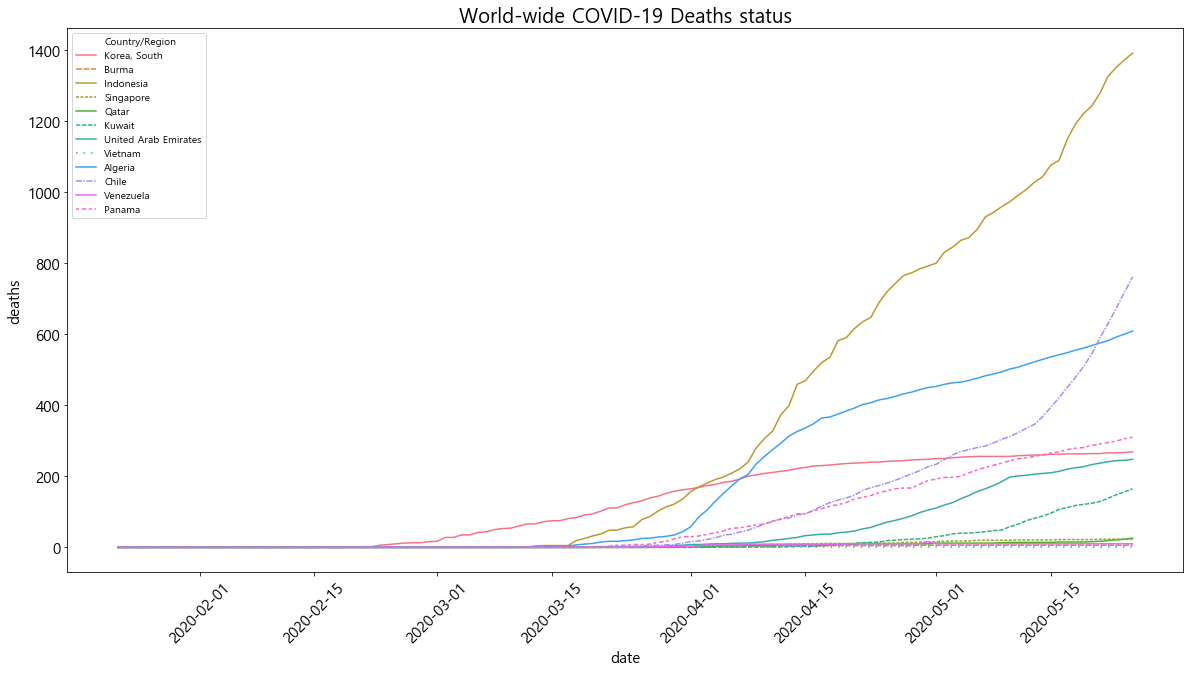

In [132]:
#진출국 사망자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Deaths status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='deaths',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

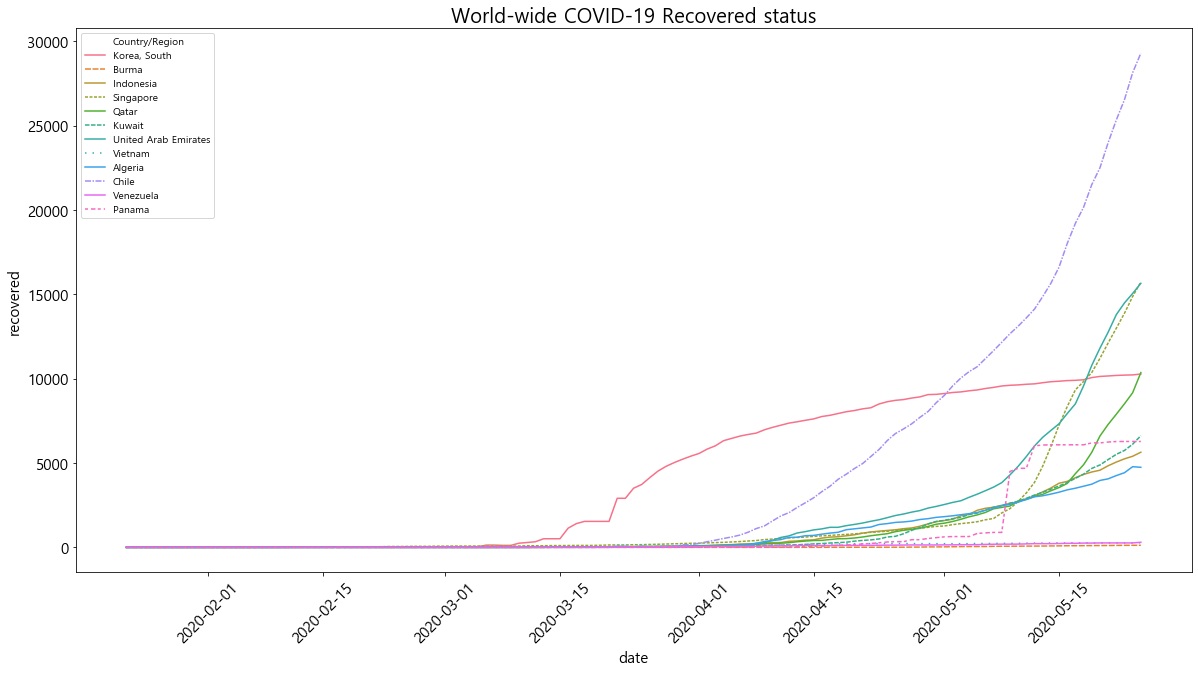

In [131]:
#진출국 완치자Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Recovered status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='recovered',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

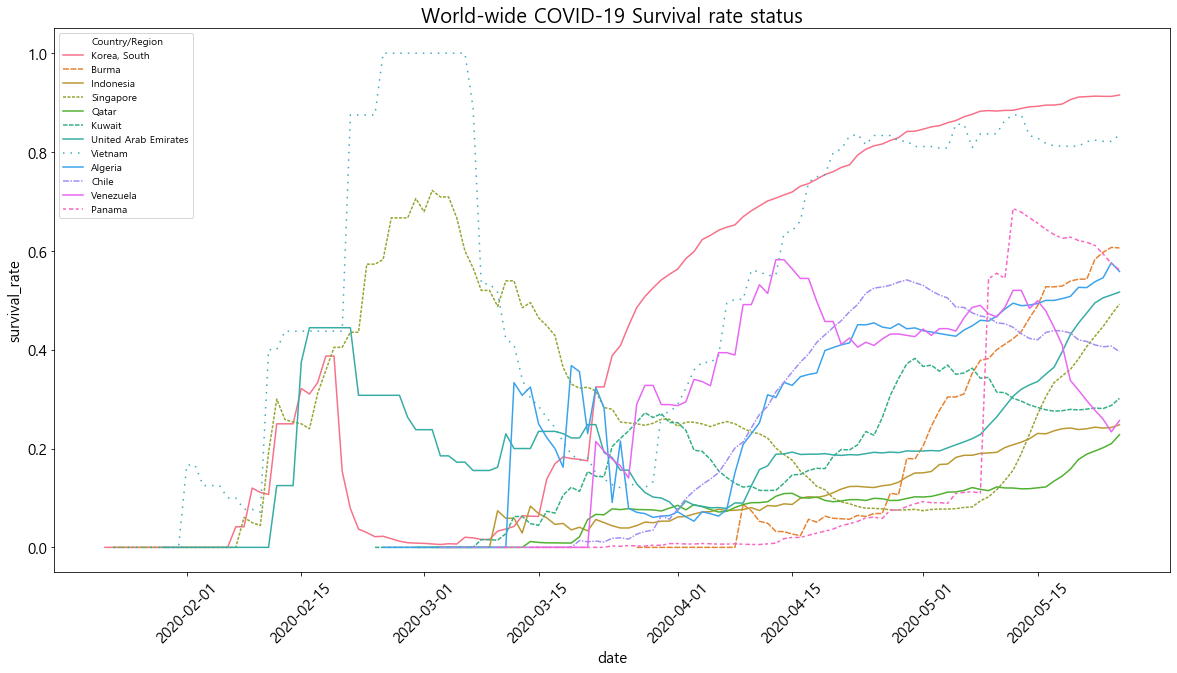

In [130]:
#진출국 완치율Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Survival rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='survival_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()

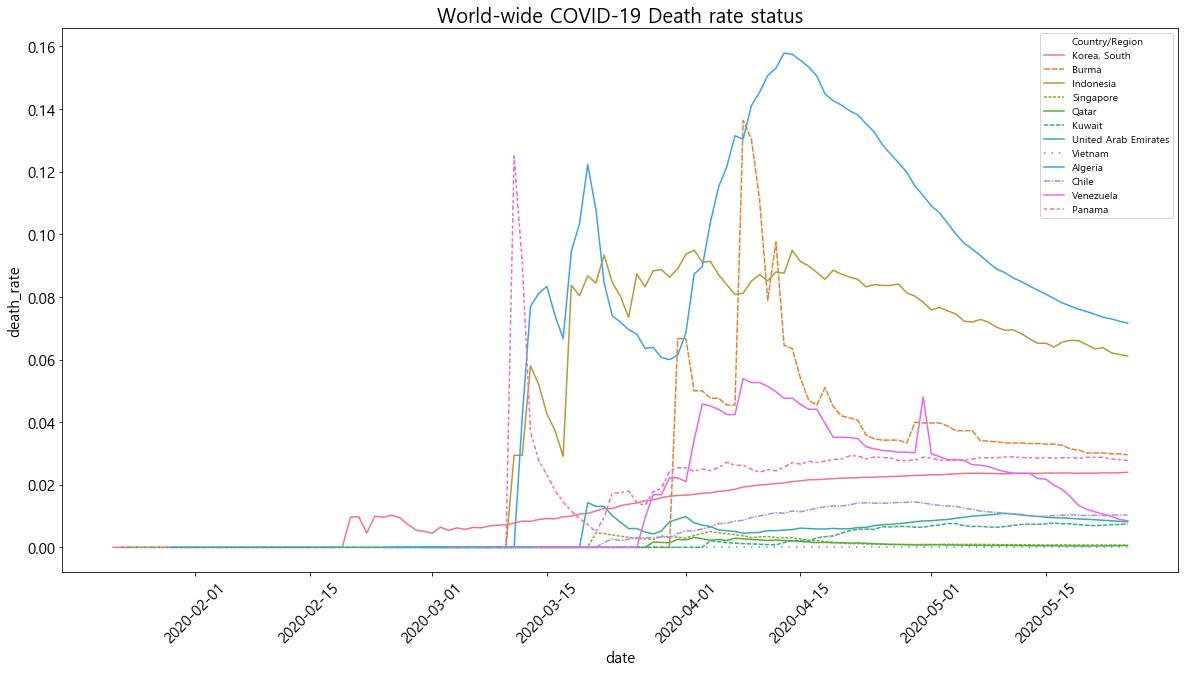

In [129]:
#진출국 사망율Time Series data visualization

plt.figure(figsize=(20,10))
plt.title('World-wide COVID-19 Death rate status', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_color_codes(palette='bright')

dash_styles = ["",(4, 1),"",(2, 1),"",(3, 1),
               "",(1, 4, 1, 4),"",(4, 1, 1, 1),"",(2, 2, 3, 1.5)]
              
ax=sns.lineplot(x='date',y='death_rate',hue='Country/Region', style='Country/Region',dashes=dash_styles, data=ttl_df)

plt.show()